In [1]:
import pandas as pd
#from utils import downloadData,extract_file,to_dataframe,supprimer_lignes_na,plot_roc_curve
from ml_algorithms import SVM_Grid_search
from ml_tool import assess_NA,smooth,feature_importance
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,StratifiedKFold

from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve, RocCurveDisplay

from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold






import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import os


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-05-13 11:07:35.752043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 11:07:36.735437: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-05-13 11:0

# Load Preprocesed file in Dataframe

In [2]:
df2 = pd.read_excel("final.xlsx")

In [3]:
df=df2

# Data Statitic 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95228 entries, 0 to 95227
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  95228 non-null  int64  
 1   Unnamed: 0.1  95228 non-null  int64  
 2   Unnamed: 0    95228 non-null  int64  
 3   label         95228 non-null  object 
 4   signal        95228 non-null  object 
 5   channel       95228 non-null  object 
 6   db            95228 non-null  object 
 7   fs            95228 non-null  int64  
 8   RDAmpM        95228 non-null  float64
 9   RDAmpSD       95228 non-null  float64
 10  QRsa          95228 non-null  float64
 11  QRaSD         95228 non-null  float64
 12  S             95228 non-null  object 
 13  Q             95228 non-null  object 
 14  R             95228 non-null  object 
 15  mean_rr       95228 non-null  float64
 16  sdsd          95228 non-null  float64
 17  pnn50         95228 non-null  float64
 18  rmssd         95228 non-nu

In [5]:
df_stat=assess_NA(df)
print(df_stat)

Empty DataFrame
Columns: [Number of NA, Percent NA]
Index: []


In [6]:
print(df[df["label"] == "NotVF"].count())

Unnamed: 0.2    88487
Unnamed: 0.1    88487
Unnamed: 0      88487
label           88487
signal          88487
channel         88487
db              88487
fs              88487
RDAmpM          88487
RDAmpSD         88487
QRsa            88487
QRaSD           88487
S               88487
Q               88487
R               88487
mean_rr         88487
sdsd            88487
pnn50           88487
rmssd           88487
sdnn            88487
lf_power        88487
hf_power        88487
pos_area        88487
neg_area        88487
vlf_power       88487
ulf_power       88487
lfnu            88487
hfnu            88487
dtype: int64


In [7]:
print(df[df["label"] == "VF"].count())

Unnamed: 0.2    6741
Unnamed: 0.1    6741
Unnamed: 0      6741
label           6741
signal          6741
channel         6741
db              6741
fs              6741
RDAmpM          6741
RDAmpSD         6741
QRsa            6741
QRaSD           6741
S               6741
Q               6741
R               6741
mean_rr         6741
sdsd            6741
pnn50           6741
rmssd           6741
sdnn            6741
lf_power        6741
hf_power        6741
pos_area        6741
neg_area        6741
vlf_power       6741
ulf_power       6741
lfnu            6741
hfnu            6741
dtype: int64


In [8]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay, auc
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import label_binarize
# Plot Bar Charts
import matplotlib.cm as cm
from matplotlib.ticker import PercentFormatter


def plot_roc_curve(X, y, n_splits, gamma, C, output_path, name):
    cv = StratifiedKFold(n_splits=n_splits)

    tprs = []
    aucs = []
    accuracies = []
    precisions = []
    recalls = []
    specificities = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, axs = plt.subplots(figsize=(8, 6))
    axs.set_title("Receiver Operating Characteristic")
    axs.set_xlabel("False Positive Rate")
    axs.set_ylabel("True Positive Rate")

    for fold, (train, test) in enumerate(cv.split(X, y)):
        clf = SVC(gamma=gamma, C=C, probability=True)
        clf.fit(X[train], y[train])
        y_pred_prob = clf.predict_proba(X[test])[:, 1]
        fpr, tpr, thresholds = roc_curve(y[test], y_pred_prob, pos_label='VF')

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        viz = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc*100, estimator_name=f"ROC fold {fold+1}")
        viz.plot(ax=axs, alpha=0.3, lw=1)

        # Calculate metrics per fold
        y_pred = clf.predict(X[test])
        accuracy = accuracy_score(y[test], y_pred)
        precision = precision_score(y[test], y_pred, pos_label='VF')
        recall = recall_score(y[test], y_pred, pos_label='VF')
        tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
        specificity = tn / (tn + fp)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        specificities.append(specificity)

    # ROC plot
    axs.plot([0, 1], [0, 1], "k--", label="Luck",color='r')
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    axs.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f%% $\pm$ %0.2f%%)" % (mean_auc*100, std_auc*100),
        lw=2,
        alpha=0.5,
    )
    axs.set_xlim([-0.05, 1.05])
    axs.set_ylim([-0.05, 1.05])
    axs.set_title(f"Receiver operating characteristic curves")
    axs.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f"{output_path}/{name}_roc_svm.png")
    plt.show()

    # Define the metrics and their corresponding values
    metrics = {
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'Specificity': specificities
    }

    # Normalize the scores to range [0,1]
    def normalize_scores(scores):
        min_score = min(scores)
        max_score = max(scores)
        return [(score-min_score)/(max_score-min_score) for score in scores]

    # Create color map
    color_map = cm.get_cmap('YlGnBu')

    plt.figure(figsize=(20,20))
    folds = [f'Fold {fold+1}' for fold in range(n_splits)]

    for i, (metric_name, metric_values) in enumerate(metrics.items()):
        color_intensities = normalize_scores(metric_values)

        plt.subplot(2,2,i+1)
        plt.bar(folds, metric_values, edgecolor='k', color=color_map(color_intensities))
        plt.title(f'{metric_name} Scores')
        plt.xlabel('Fold')
        plt.ylabel(metric_name)
        mean_metric = np.mean(metric_values)
        plt.axhline(y=mean_metric, color='r', linestyle='--')
        plt.legend([f'Mean: {mean_metric:.2%}'])
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.tight_layout()
    plt.savefig(f"{output_path}/{name}_bar_metrics_svm.png")
    plt.show()

# SVM SHAP

Counter({'NotVF': 88487, 'VF': 6741})
Counter({'NotVF': 88487, 'VF': 88487})
              precision    recall  f1-score   support

          VF       0.97      0.94      0.95     26655
       NotVF       0.94      0.97      0.95     26438

    accuracy                           0.95     53093
   macro avg       0.95      0.95      0.95     53093
weighted avg       0.95      0.95      0.95     53093

Accuracy of SVM for the given dataset: 0.9530634923624584


/tmp/ipykernel_19279/196125077.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axs.plot([0, 1], [0, 1], "k--", label="Luck",color='r')


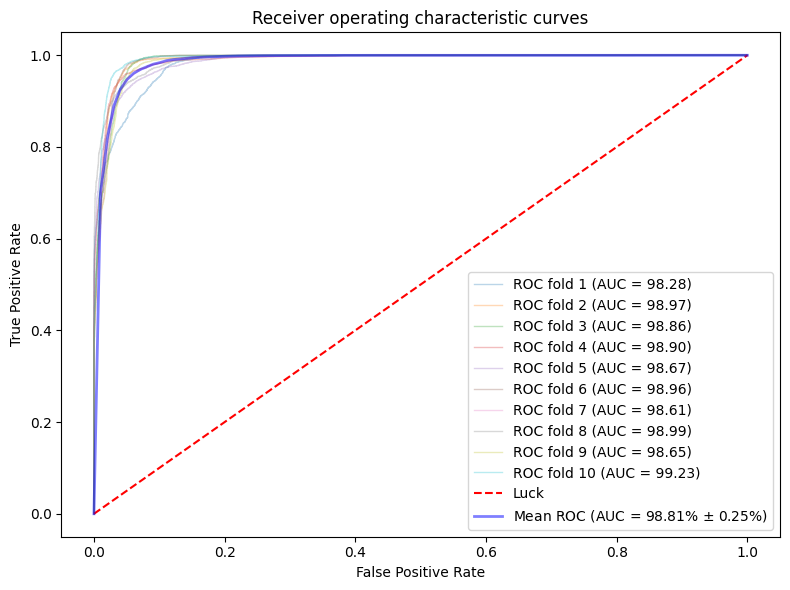

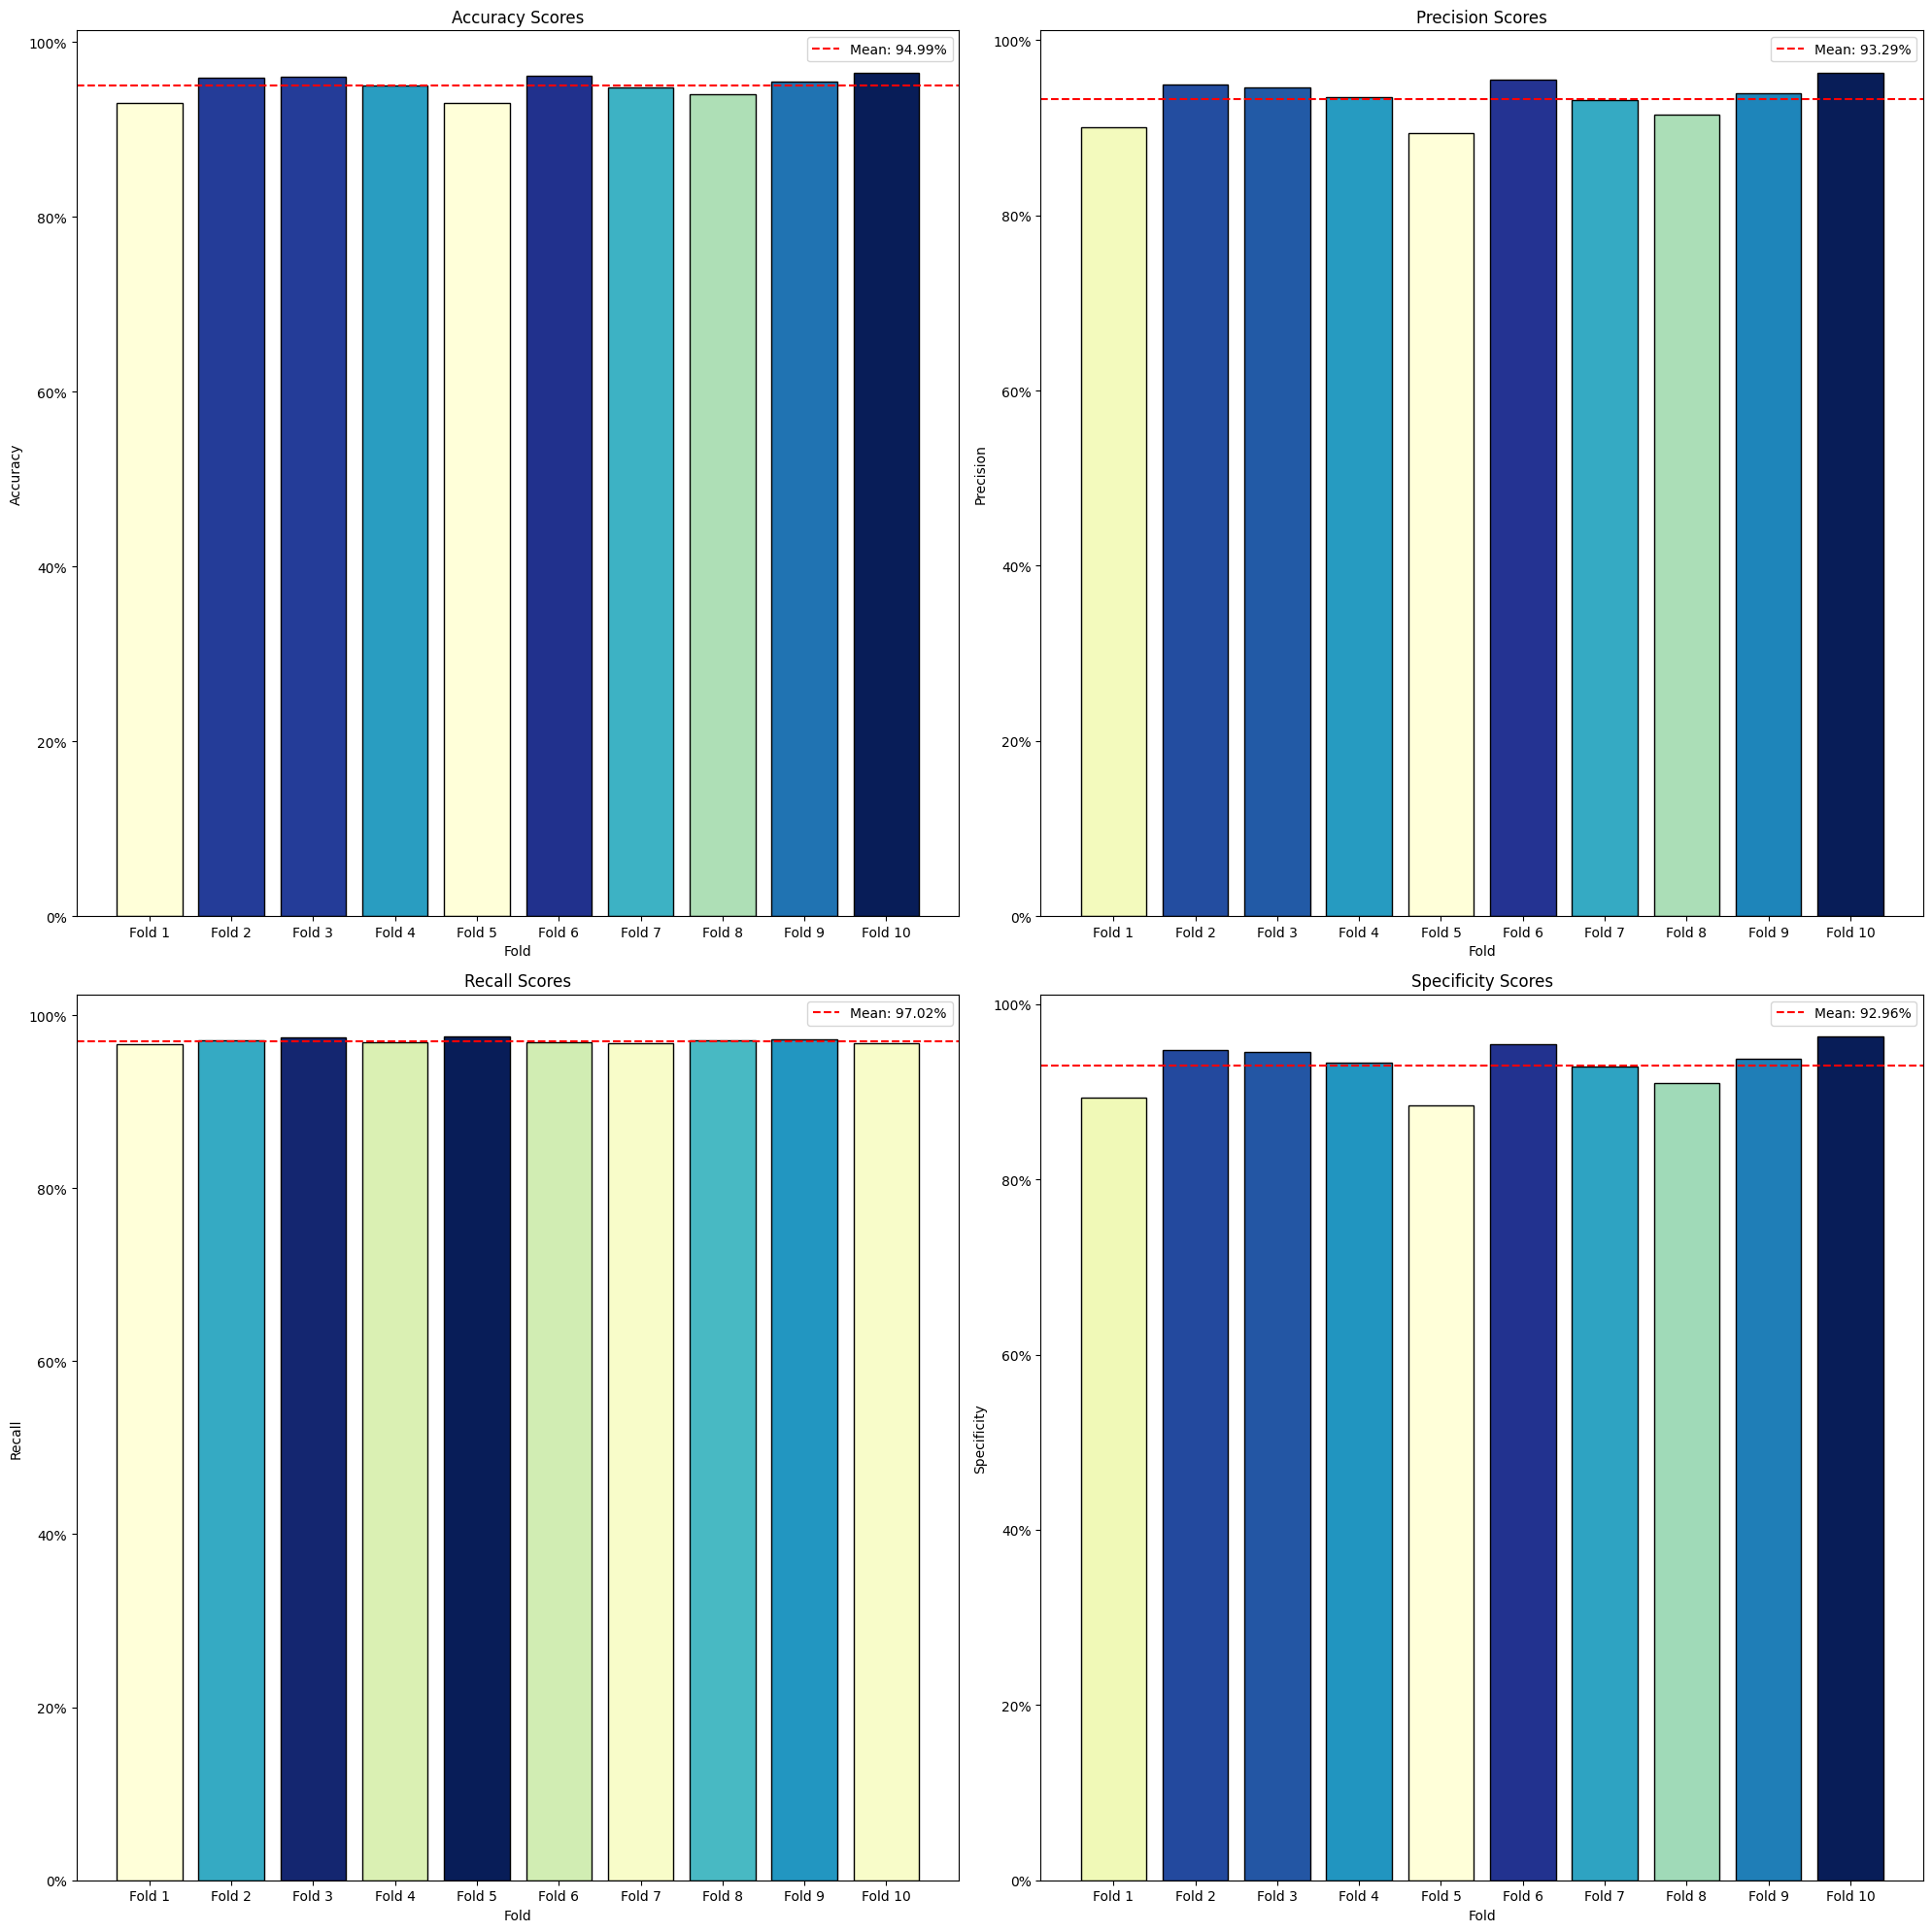

In [9]:
# define dataset
X1=df[['RDAmpM','RDAmpSD', 'QRsa', 'QRaSD',]]
y1=df["label"]
X,y=smooth(X1,y1)

X_cv = X.to_numpy()
y_cv=y.ravel()

gamma=[10]
C=[10]
SVM_Grid_search(gamma,C,X,y,"./final","shape")
gamma=10
C=10
plot_roc_curve(X_cv, y_cv,10,gamma,C,"./final",'shape')


# SVM ALLshape 

Counter({'NotVF': 88487, 'VF': 6741})
Counter({'NotVF': 88487, 'VF': 88487})
              precision    recall  f1-score   support

          VF       0.99      0.96      0.98     26655
       NotVF       0.96      0.99      0.98     26438

    accuracy                           0.98     53093
   macro avg       0.98      0.98      0.98     53093
weighted avg       0.98      0.98      0.98     53093

Accuracy of SVM for the given dataset: 0.9761173789388432


/tmp/ipykernel_19279/196125077.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axs.plot([0, 1], [0, 1], "k--", label="Luck",color='r')


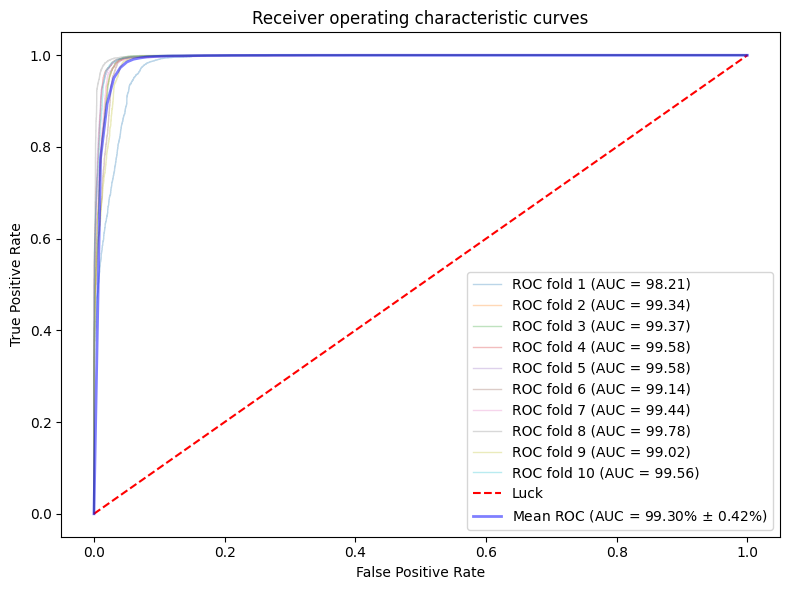

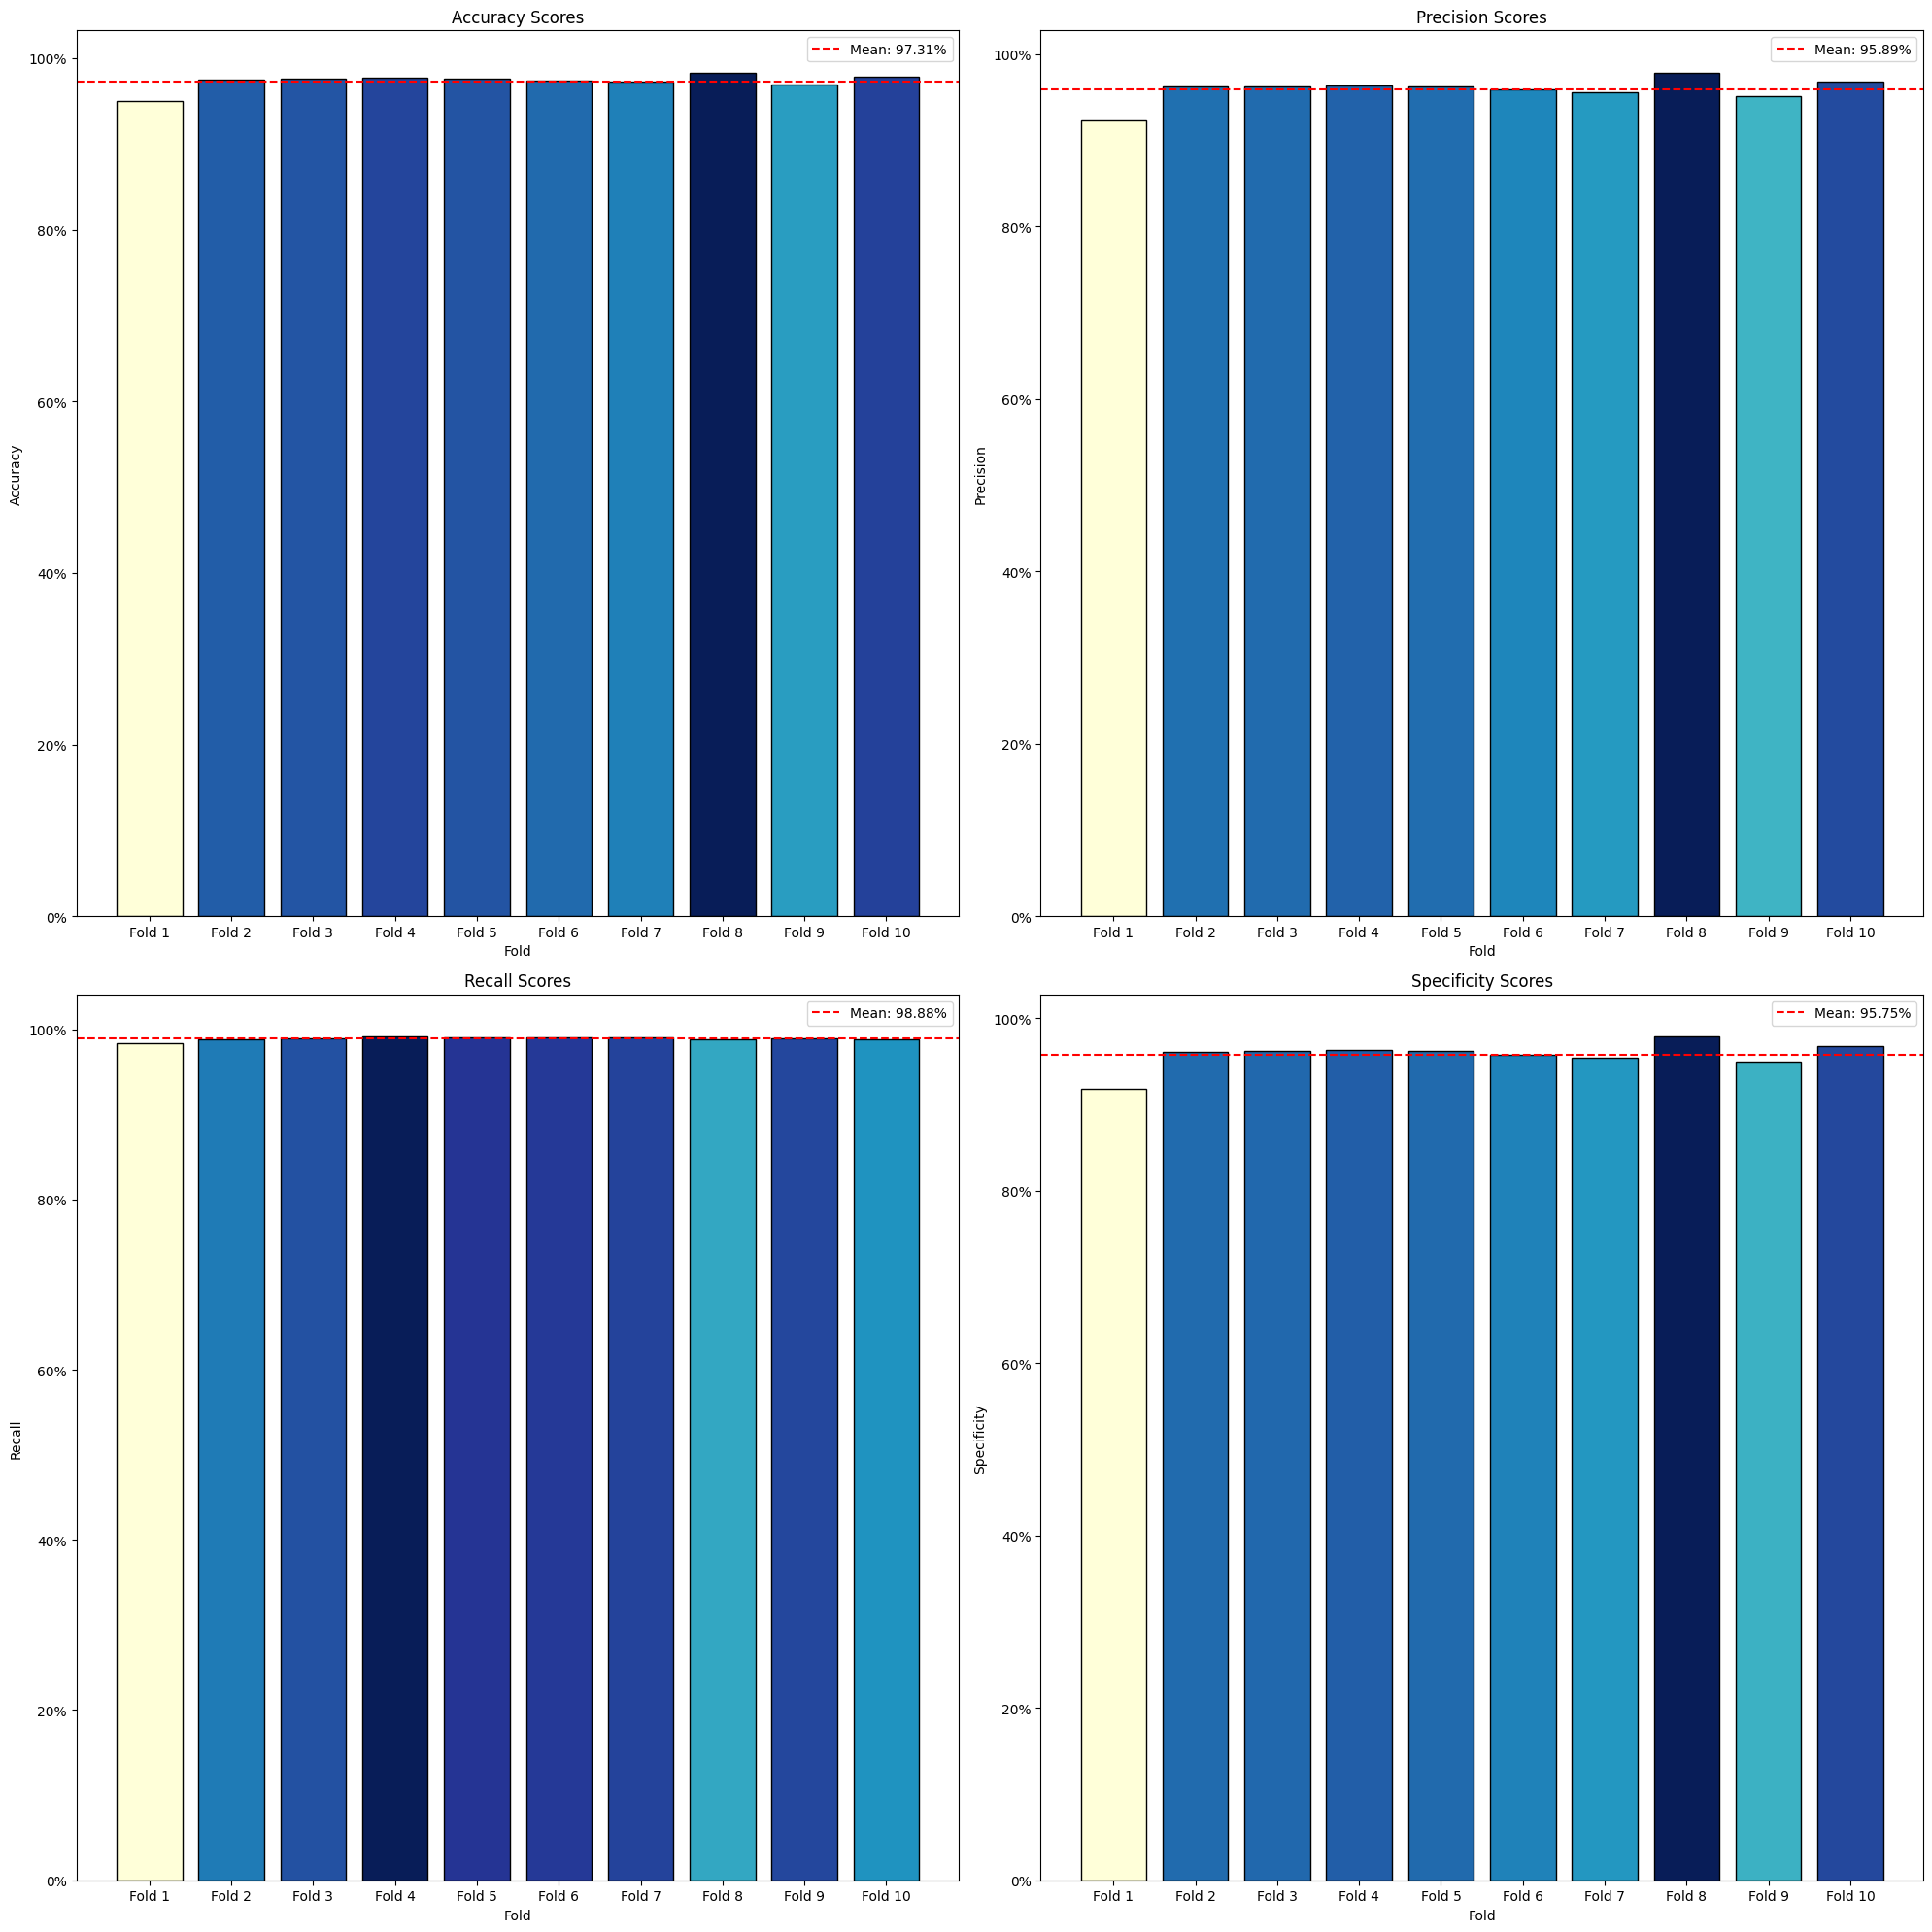

In [10]:
# define dataset
X1=df[['RDAmpM','RDAmpSD', 'QRsa', 'QRaSD','pos_area','neg_area']]
y1=df["label"]
X,y=smooth(X1,y1)

X_cv = X.to_numpy()
y_cv=y.ravel()

gamma=[10]
C=[10]
SVM_Grid_search(gamma,C,X,y,"./final","all_shape")
gamma=10
C=10
plot_roc_curve(X_cv, y_cv,10,gamma,C,"./final",'allshape')


# SVM hrv

In [ ]:
# define dataset
X1=df[['RDAmpM','RDAmpSD','mean_rr', 'sdsd', 'pnn50','rmssd', 'sdnn','hfnu']]
y1=df["label"]
X,y=smooth(X1,y1)

X_cv = X.to_numpy()
y_cv=y.ravel()

gamma=[10]
C=[10]
SVM_Grid_search(gamma,C,X,y,"./final","hrv")
gamma=10
C=10
plot_roc_curve(X_cv, y_cv,10,gamma,C,"./final","hrv")



Counter({'NotVF': 88487, 'VF': 6741})
Counter({'NotVF': 88487, 'VF': 88487})
              precision    recall  f1-score   support

          VF       0.68      1.00      0.81     26655
       NotVF       1.00      0.53      0.69     26438

    accuracy                           0.76     53093
   macro avg       0.84      0.76      0.75     53093
weighted avg       0.84      0.76      0.75     53093

Accuracy of SVM for the given dataset: 0.7649407643192134
